# Neural regression

### First we need to generate training data

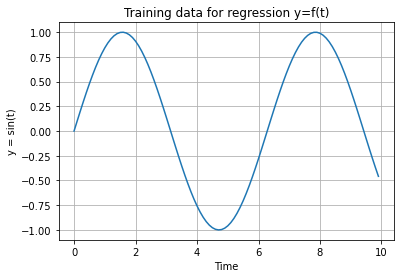

In [1]:
import numpy as np
import matplotlib.pyplot as plot

# Generate a sine wave
t = np.arange(0, 10, 0.1);
y = np.sin(t)
plot.plot(t, y)
plot.title('Training data for regression y=f(t)')
plot.xlabel('Time')
plot.ylabel('y = sin(t)')
plot.grid(True, which='both')
plot.show()

### Then we define NNet by adding suitable number of layers and neurons

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

# Model sequential
model = Sequential()

# 1st hidden layer (we also need to tell the input dimension)
# 10 neurons, but you can change to play a bit.
model.add(Dense(25, input_dim=1, activation='sigmoid'))

# 2nd hidden layer - YOU MAY TEST THIS
model.add(Dense(25, activation='sigmoid'))

# 3nd hidden layer.
model.add(Dense(25, activation='sigmoid'))

# Output layer
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='tanh'))

# Learning rate has huge effect 
keras.optimizers.SGD(lr=0.5)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

### We train the network for number of epochs (10-10000, but you may test different values)

In [20]:
model.fit(t, y, epochs=10000, verbose=0)

### Let's test how well the network models the data

0.09983341664682815
[0.99998385]
72.4197617195245
0.8218422754726047
100
82.18422754726048
MSE= 0.1724413336753121


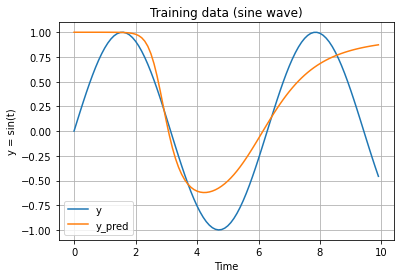

In [21]:
from sklearn.metrics import mean_squared_error 

y_pred = model.predict(t)

print(y[1])
print(y_pred[1])

print(np.sum(np.absolute(np.subtract(y,y_pred)))/len(t))
print(np.square(np.subtract(y,y_pred)).mean())
print(len(y))

print(np.divide(np.sum(np.square(y-y_pred)),len(y)))
print('MSE=',mean_squared_error(y,y_pred))

plot.plot(t, y, label='y')
plot.plot(t, y_pred, label='y_pred')
plot.title('Training data (sine wave)')
plot.xlabel('Time')
plot.ylabel('y = sin(t)')
plot.grid(True, which='both')
plot.legend()
plot.show()

# Neural classification

### Let's make two classes in 2D

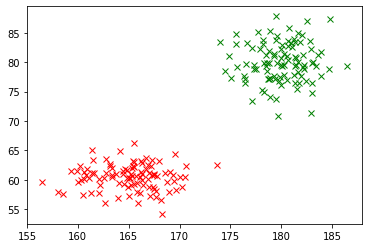

In [52]:
# Some random experiments with 2D Gaussians
mu1 = [165,60]
cov1 = [[10,0],[0,5]]
mu2 = [180,80]
cov2 = [[6,0],[0,10]]
x1 = np.random.multivariate_normal(mu1, cov1, 100)
x2 = np.random.multivariate_normal(mu2, cov2, 100)
plot.plot(x1[:,0],x1[:,1],'rx')
plot.plot(x2[:,0],x2[:,1],'gx')

In [57]:
# Model sequential
model2 = Sequential()

# 1st hidden layer (we also need to tell the input dimension)
model2.add(Dense(10, input_dim=2, activation='sigmoid'))

# 2nd hidden layer
# model2.add(Dense(10, activation='sigmoid'))

# Output layer
# model2.add(Dense(1, activation='sigmoid'))

# Output is 2D - [1 0] for class 1 and [0 1] for class 2
model2.add(Dense(2, activation='sigmoid'))

keras.optimizers.SGD(lr=0.1)
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [62]:
# Let's for the the 2D N input samples X and their 2D output labels Y
X = np.row_stack((x1, x2))
print(X.shape)
y1 = np.empty([x1.shape[0],2])
y1[:,0] = 1
y1[:,1] = 0
y2 = np.empty([x2.shape[0],2])
y2[:,0] = 0
y2[:,1] = 1
Y = np.row_stack((y1,y2))
#print(Y)
model2.fit(X, Y, epochs=100, verbose=1)

(200, 2)
Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2508 - mse: 0.2508
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2508 - mse: 0.2508
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2508 - mse: 0.2508
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2508 - mse: 0.2508
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2507 - mse: 0.2507
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2507 - mse: 0.2507
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2507 - mse: 0.2507
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2507 - mse: 0.2507
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2507 - mse: 0.2507
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2506 - mse: 0.2506
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss

7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 94/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 95/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 96/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - mse: 0.2501
Epoch 97/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500
Epoch 98/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500
Epoch 99/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2501 - ms

In [60]:
print(Y)

# You may check outputs for training data x1 (should be 1 0) and x2 (0 1)
print(model2.predict(x1[0:9,:]))
print(model2.predict(x2[0:9,:]))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

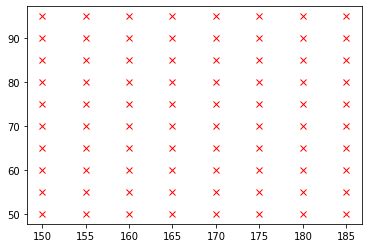

In [61]:
# Let's plot how classification changes in different parts of the input space
for xi in range(150,190,5):
    for yi in range(50,100,5):
        inp = np.empty([1,2])
        inp[0,0] = xi
        inp[0,1] = yi
        cl_prob = model2.predict(inp)
        if cl_prob[0][0] > cl_prob[0][1]:
            plot.plot(xi,yi,'rx')
        else:
            plot.plot(xi,yi,'gx')